# Time Series Analysis


## 1. Introduction to Time-Series Analysis

A time-series is a sequence of data points indexed in time order. Time-series analysis is used to understand and predict patterns in data using methods that extract meaningful statistics. Some common applications of time series analysis are forecasting, econometrics, signal processing, pattern recognition, etc...

**Time-series components**:

* **Trend**: shows a general direction of the time-series data over a long period of time. A trend can be *increasing, decreasing or stationary*.

* **Seasonality**: fluxuations that occur regularly based on a season or specific period, a repeating short-term cycle in the series data. For example, an increase of in fire place usage during winter and summer.

* **Cyclical component**: patterns that arise in extended time series, typically over the long-term (i.e. multiple years). These are trends with no set repetition over a particular period of time, unlike seasonality. An example would be the expansion and contraction phases in a business cycle that don't necessarily occur in regular intervals. 

* **Irregular variation or Noise**: random variation in the series. It is the component of the time series that cannot be attributed to the trend, seasonality or cyclic pattern. 

**ETS Decomposition**, that stands for Error, Trend and Seasonality, is used to separate these different components. 


### Some Terminology

* **Dependence**: association of two observations of the same variable at prior time periods.


* **Stationarity**: shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met. When a time series is stationary, its statistical properties, such as mean, variance, and autocorrelation, remain constant over time.


* **Differencing**: used to make the series stationary and to control the auto-correlations. There may be some cases in time series anlyses where we do not require differencing and over differences  series can produce wrong estimates. In the context of time series analysis, differencing can be understood as the process of subtracting the previous observation from the current observation:

$$\text{Difference(t) = Y(t) - Y(t-1)}$$


* **Specification**: refers to the process of determining the most appropriate model or structure to represent the underlying data-generating process of a given time series. Misspecification can lead to inaccurate and unreliable inference or forecasting. When working on specification, we are often concerned with selecting the right parameters for models like ARIMA, deciding on additive vs. multiplicative seasonality, determining lag lengths, etc.


* **Exponential Smoothing**: predicts the one next period value based on the past and current value. The core idea behind Exponential Smoothing is to give more weight to recent observations and progressively less weight to older observations. The weights decrease exponentially as the observations get older. It involves averaging of data such that non-systematic components of each individual case or observation cancel out each other. 

    The formula for *Simple Exponential Smoothing* (SES, used for time series without a clear trend or seasonality, can be represented as follows:

$$F_t = \alpha * Y_{t-1} + (1-\alpha)*F_{t-1}$$

    Where $\alpha$ is the smoothing parameter ($0 < \alpha < 1$). Other Exponential Smoothing methods are: *Holt's Linear Exponential Smoothing*, used for time series with a trend but no seasonality, and *Holt-Winters' Exponential Smoothing*, used for time series with both a trend and seasonality.

    Exponential smoothing methods make a *crucial assumption*: forecasts are a function of past observations and past forecast errors. This might not be suitable for all time series data, especially when there are sudden structural changes or when the data-generating process is inherently non-linear.




## 2. Time Series Analysis

### Basic Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

### Import data

In [5]:
df = pd.read_csv('data/AirPassengers.csv')
df.columns = ['Date', 'Passengers']
df.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Visualized the Time Series

In [9]:
# define a function that will be re-used
def plot_ts(df, x, y, title = '', xlabel = 'Date', ylabel = 'Number of Passengers', dpi = 100):
    plt.figure(figsize=(17,4), dpi = dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=80)
    plt.show()

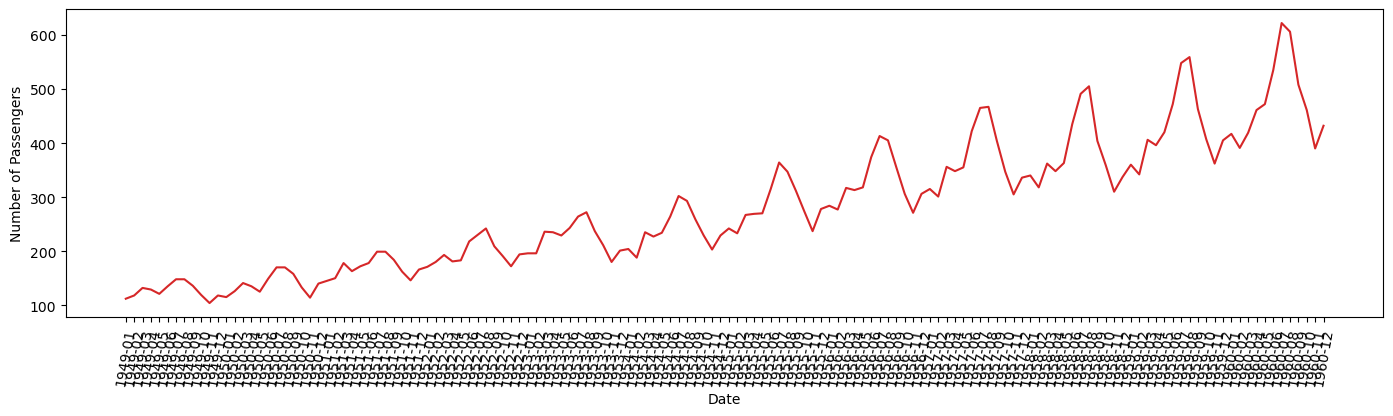

In [10]:
plot_ts(df, x=df['Date'], y=df['Passengers'])

* To emphasize the increasing trend, we can show a mirror plot along the x axis.

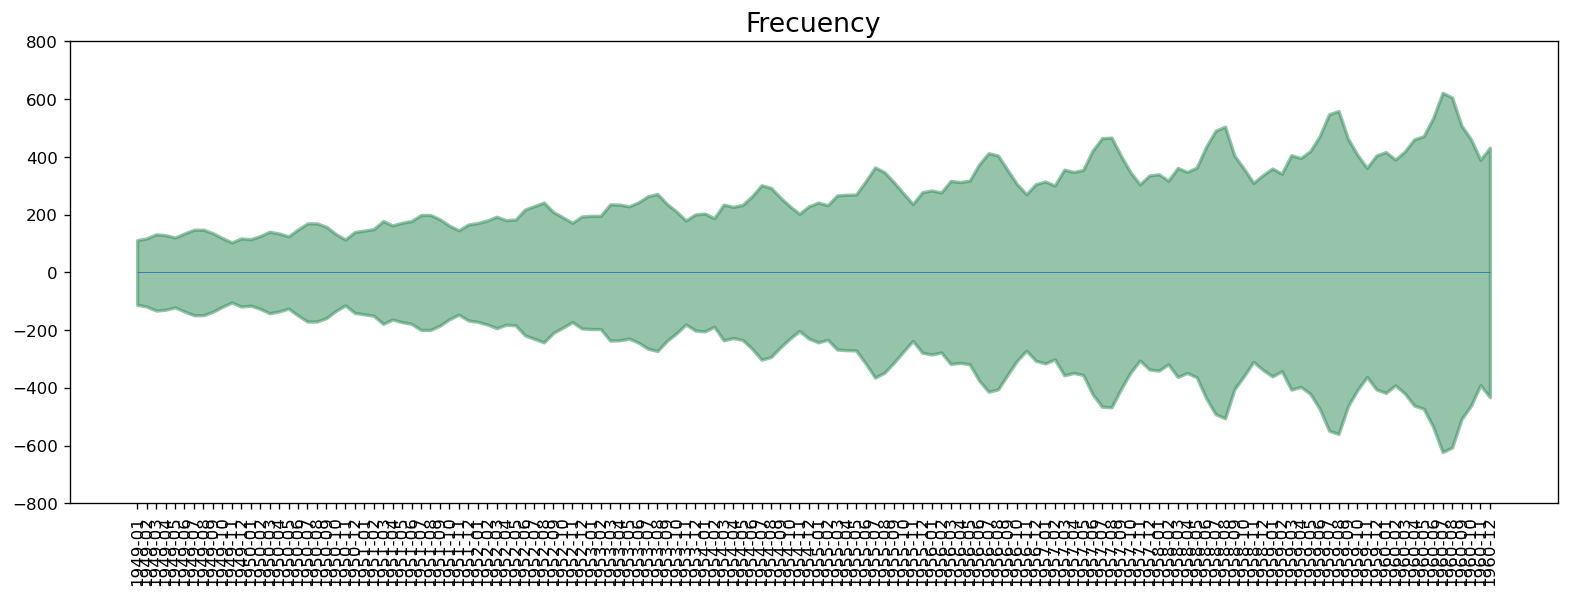

In [14]:
x = df['Date'].values
y1 = df['Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Frecuency', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.xticks(rotation=90)
plt.show()

* Each data point corresponds to the monthly amount of passengers between 1949 and 1969. We can see it follows a repetitive pattern that has an increasing trend and a yearly seasonality.


### Patterns in a Time Series

* An **Additive Model** will show the following component relationship:

$$Y_t = \text{Trend} + \text{Seasonality} + \text{Cyclic} + \text{Noise}$$

* A **Multiplicative Model** will show the following component relationship:

$$Y_t = \text{Trend} * \text{Seasonality} * \text{Cyclic} * \text{Noise}$$

In general, a time series may not have a *trend* or a *seasonality*. The current time series, as observed in the previous plot, has both.

### Decomposition of a time series

The decomposition of a time series, as mentioned above, can follow a *Additive or Multiplicative Model*  depending on the nature of the time series. If the magnitude of the seasonal pattern, or the variation around a trend, appears to be roughly constant, an additive decomposition is more appropriate. If the magnitude of the seasonal pattern or the variation around the trend, appears to be proportional to the level of the time series, then a multiplicative decomposition is more suitable.

#### Decomposition steps:

1. **Choose a model**: choose whether an additive or multiplicative model is more appropriate given the nature of the time series.<br><br>


2. **Estimate the trend**: a common method is the **moving average**. For example, for a yearly pattern, a 12 month moving average can help ascertain the trend component. Another technique could involve **polynomial regression** or **Locally Estimated Scatterplot Smoothing (LOESS)**. For a **moving average** we must follow the steps bellow:

    * **Define a Window Size**: decide on the number of periods (n) you want to include in the moving average. 
    
    * **Compute the Average**: for each time point *t*, we calculate the average of the surronding *n* points. The manner in which we average depends on whether we use a *simple or centered moving average*
    
        * **Simple MOving Average (SMA)**: for each time point *t*, the average is taken on the *n* preceding data points including the current point:
        
        $$SMA(t) = \frac{Y_{t-(n-1)} + \dots + Y_{t-1} + Y_t}{n}$$
        
        
        * **Centered Moving Average (CMA)**: the average is taken such that the current time point *t* is in the center (when *n* is odd, when *n* is even there's a slight variation where we can take the average of 2 centered sequences), and is expressed:
        
        $$CMA(t) = \frac{Y_{t-(n-1)}/2 + \dots + Y_{t-1}/2 + Y_t/2}{n}$$
        
        
        * **Plot the averages**: once we've calculated the moving averages for each time point, we can plot them alongsid the original time series to visualize the estimated trend.
        
        
        * **Limitations**: it gives equal weight to all points in a window, which may not be ideal for time-series where recent observations are more indicative of the trend. It doesn't reach up to the starting and ending points of the time series because of the window size. This means we can't compute a moving average for the first and last few observations, depending on the window size. It might not capture more complex trends or non-linearities.<br><br>
        

3. **Deseasonalize the series**: for *additive* series, substract the trend component from the original series. For a *multiplicative* series, we divide the original series by the trend.<br><br>


4. **Estimate the Seasonal Component**: for each season, calculate the average of the detrended values for that season.<br><br>


5. **Estimate the Residual Component**: for an *additive* series we substract the estimated trend and the seasonal components from the original series. For the *multiplicative* series we divide the original series by the estimated trend and seasonal components.<br><br>

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [17]:
# Multiplicative decomposition
multi_decom = seasonal_decompose(df['Passengers'], model = 'multiplicative', period=30)

# Additive decomposition
additive_decom = seasonal_decompose(df['Passengers'], model = 'additive', period = 30)

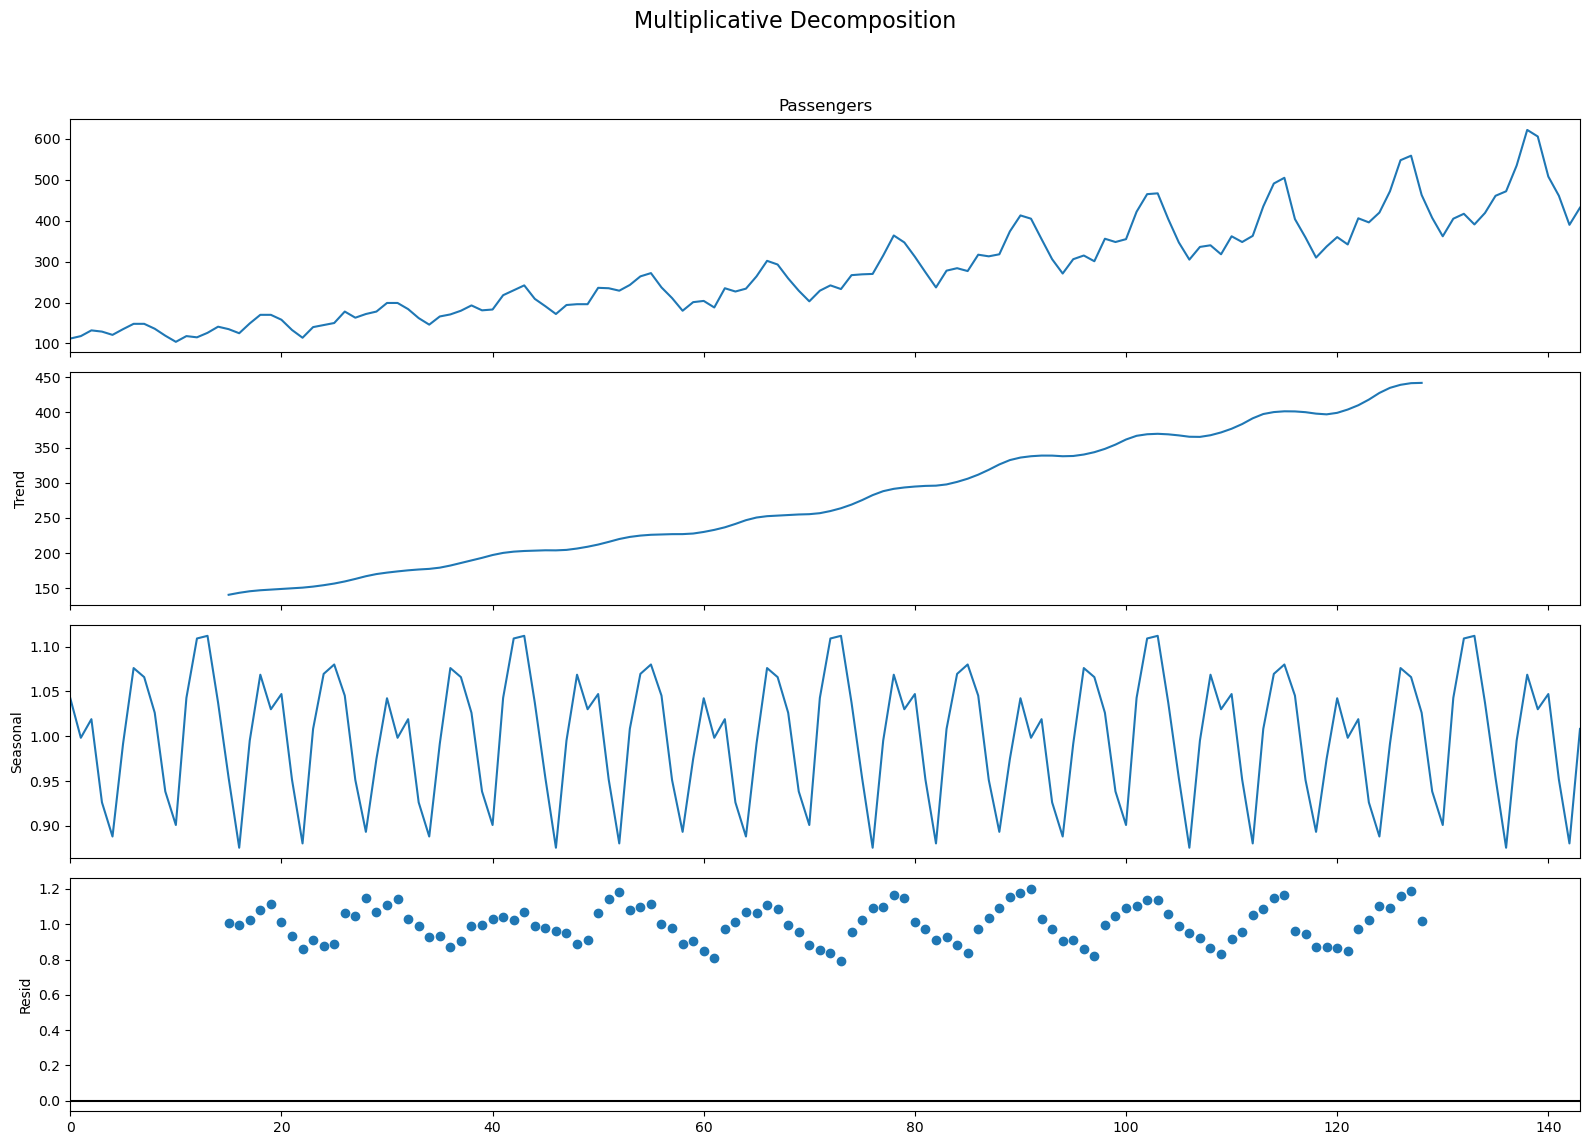

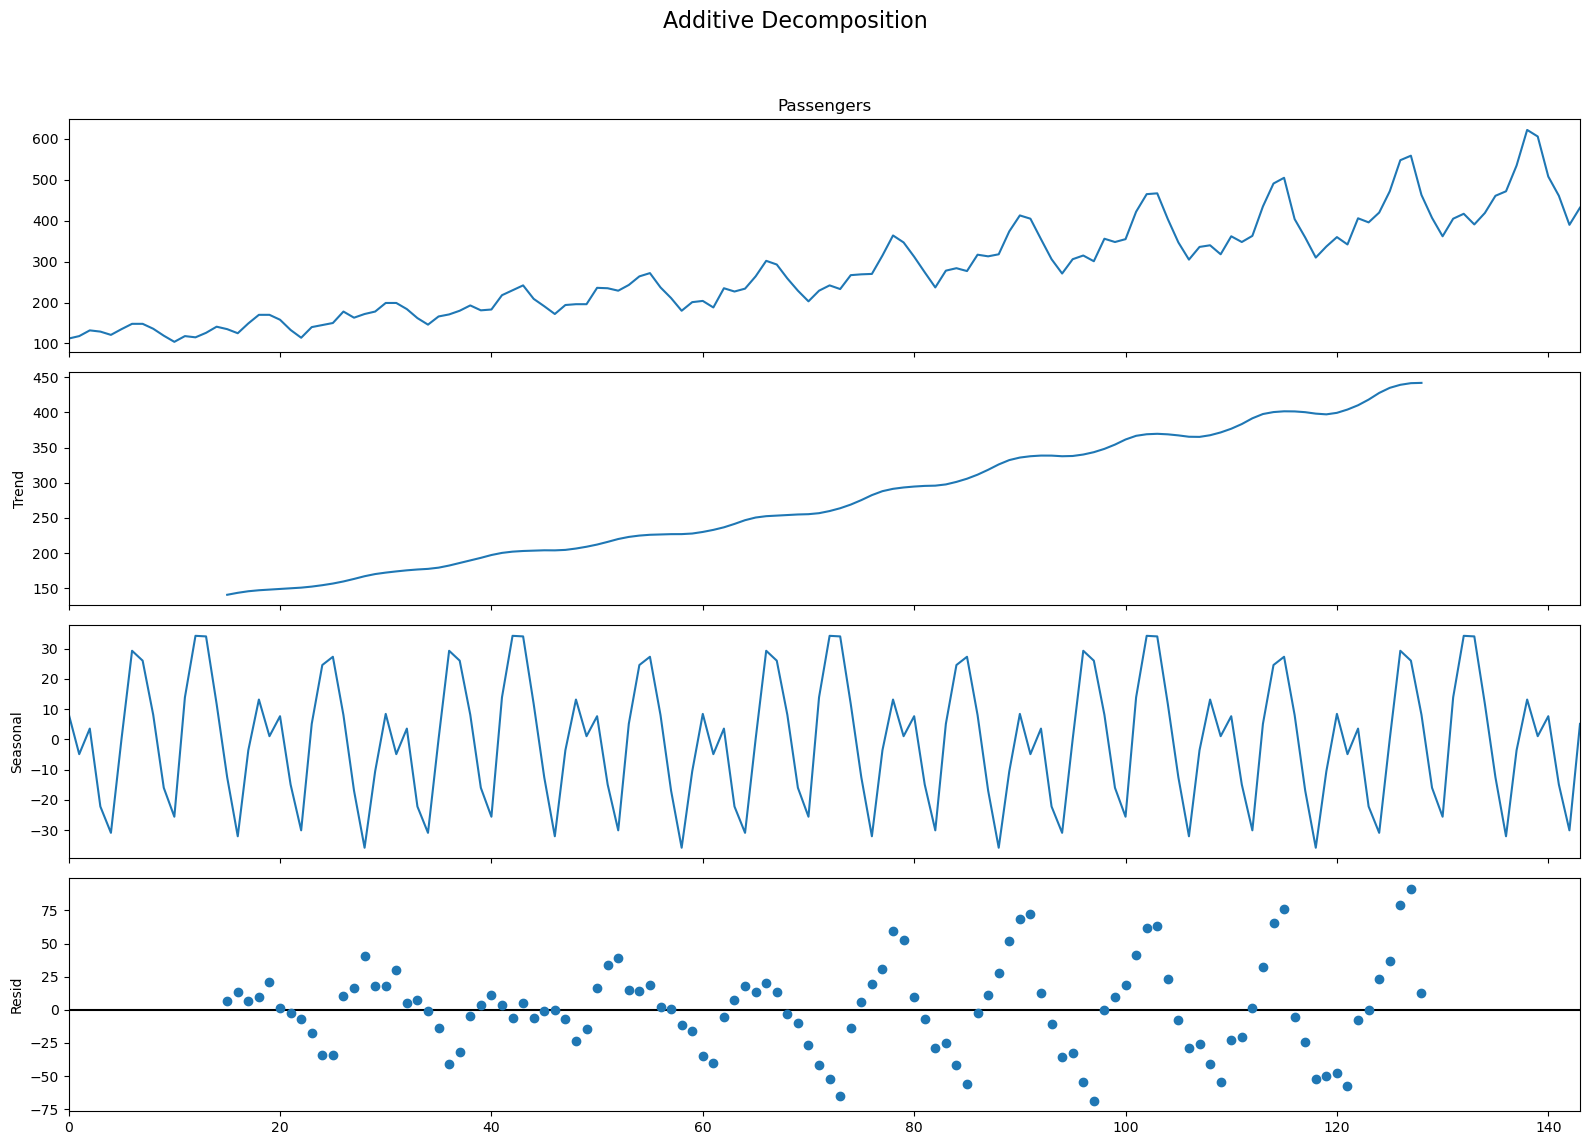

In [19]:
# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multi_decom.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decom.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()